In [1]:
import os
import glob
from plotdata import *

import matplotlib.pyplot as plt
import numpy as np
from cmocean import cm
import pandas as pd
from utils import *

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.mpl.ticker as cticker
from cartopy.io.shapereader import Reader, natural_earth
import matplotlib.ticker as mticker


In [2]:
# Definir diretorio
os.chdir('Trends_NC/Precip_trend/')

In [3]:
path_shape = '/home/luiz/Documentos/Shapefiles/South_America_ecorreg_diss/'
path_shape_ipcc = '/home/luiz/Documentos/Shapefiles/IPCC_Regions_SA/'

In [4]:
# Pegar lista de arquivos
lista_nc = glob.glob('*.nc')
# Sort list by other list
list_index = ['r10mm', 'r20mm', 'r30mm', 'rx1day', 'rx5day', 'prcptot', 'sdii', 'r95p', 'r99p', 'cwd', 'cdd']
lista_nc = [x for x in lista_nc if x.split('_')[0] in list_index]
lista_nc.sort(key=lambda x: list_index.index(x.split('_')[0]))
lista_nc

['r10mm_Trend_SA.nc',
 'r20mm_Trend_SA.nc',
 'r30mm_Trend_SA.nc',
 'rx1day_Trend_SA.nc',
 'rx5day_Trend_SA.nc',
 'prcptot_Trend_SA.nc',
 'sdii_Trend_SA.nc',
 'r95p_Trend_SA.nc',
 'r99p_Trend_SA.nc',
 'cwd_Trend_SA.nc',
 'cdd_Trend_SA.nc']

## Loop para o plot de todos os indices

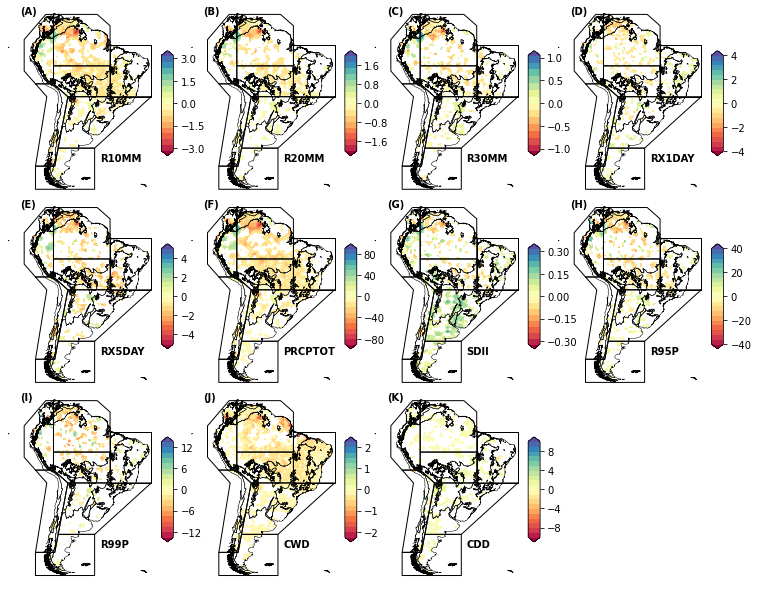

In [11]:
# Definir variaveis globais

# Setar projeção
proj = ccrs.PlateCarree()
# paleta de cores
cmap = 'Spectral'
# Definir niveis
levels = 20
# Lista com os indices
index_name = [name.upper().split('_')[0] for name in lista_nc]
# Linhas e colunas
nrows=3
ncols=4
ABC = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

# Criar a figura
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                       subplot_kw={'projection':proj},
                       figsize=[16.,15])
# axs é uma matriz GeoAxes bidimensional. Utilizar o flatten para transformar
# a matriz em unidimensional
axs=axs.flatten()

# Loop
for index, index_ax, abc in zip(lista_nc, np.arange(len(lista_nc)), ABC):
    # Abrir o arquivo
    ds = xr.open_dataset(index)
    # indexar as variaveis de tendencia e nivel de significancia
    trend = ds['Trend']
    sig = ds['Sig']
    # Definir o nivel de significancia
    alpha = 0.05 #
    
    # Plot
    cs = trend.where(sig <= alpha).plot.contourf(ax=axs[index_ax],
                                                transform=proj,
                                                cmap=cmap,
                                                levels=levels,
                                                extend='both',
                                                add_colorbar=False)
    
    #Barra de cores
    cbar = fig.colorbar(cs, orientation='vertical',
                        shrink=.245,
                        pad=0.0,
                        label='',
                        aspect=8.,
                        ax=axs[index_ax])

    # Set frequency cbar ticks to 5
    cbar.locator = mticker.MaxNLocator(nbins=5)
    cbar.update_ticks()
    
    # Plot map 
    create_maps(axs[index_ax], shape=True, shapefile=path_shape)
    axs[index_ax].axis('off')

    # Text
    axs[index_ax].text(x=-54,y=-45., s=index_name[index_ax], fontdict={'fontweight':'bold', 'fontsize':10})
    axs[index_ax].text(x=-85,y=12., s='('+abc.upper()+')', fontdict={'fontweight':'bold', 'fontsize':10})

    # Background
    plot_shapefile(axs[index_ax], shapefile=path_shape_ipcc)
    
fig.delaxes(axs[11])    
fig.subplots_adjust(right=0.76,hspace=-0.55, wspace=0.01) #hspace=0.05 hspace=0.15
# Set facecolor
fig.set_facecolor('white')

# plt.savefig('/home/luiz/Jupyter_Notebook/Python_Notebook/Climate_Extremes_DOC/Trends-Precip.png',
# dpi=600, bbox_inches='tight', facecolor='white')